In [88]:
import pandas as pd
from matplotlib import pyplot as plt

In [89]:
df = pd.read_csv("data/heterogeneity.csv")
df.head()

,strategies,memory,threshold,cf,sigma,std
0,2,10,6000.0,mse,0.000,0.680337
1,2,10,6000.0,mse,0.125,0.655521
2,2,10,6000.0,mse,0.250,0.446142
3,2,10,6000.0,choice,0.000,927.914446
4,2,10,6000.0,mse,0.375,0.188562


In [90]:
df.groupby(["memory", "strategies"]).count()

threshold  cf  sigma  std
memory strategies                           
10     2                  32  32     32   32
       10                 32  32     32   32
       18                 32  32     32   32
       26                 32  32     32   32
       34                 32  32     32   32
       42                 32  32     32   32
       50                 32  32     32   32

In [65]:
df.groupby(["memory", "strategies"])["std"].mean()

memory  strategies
2       2              256.293099
        5              782.991738
        8             1102.787398
        10            1782.390946
        11            1336.644475
        14            1567.864142
        17            1783.993034
        20            1960.661516
5       10             865.350664
8       10             460.249156
10      2              177.093600
        10             621.498715
        18             678.722450
        26             775.600015
        34             818.638077
        42             822.477000
        50             915.635965
11      10             510.260635
14      10             346.389601
17      10             310.297674
20      10             226.959753
Name: std, dtype: float64

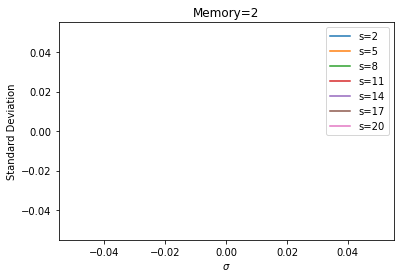

In [91]:
import numpy as np

def plot_vs_sigma(strategies, memory, cf, sigma_max=8):
    filtered = df[(df.strategies==strategies) & (df.memory==memory) & (df.cf==cf) & (df.sigma <= sigma_max)][["sigma", "std"]]

    vals = filtered.groupby("sigma").mean()
    errs = filtered.groupby("sigma").std()
    
    sigmas = vals.index
    # sigmas = vals.index + rng.normal(0,0.1, size=vals.index.shape)

    yerr = errs.values
    
    
    plt.plot(sigmas, vals.values)
    plt.fill_between(sigmas, np.ravel(vals.values - yerr), np.ravel(vals.values+yerr),alpha=0.3)
    
    
plot_vs_sigma(2,2,"mse")
plot_vs_sigma(5,2,"mse")
plot_vs_sigma(8,2,"mse")
plot_vs_sigma(11,2,"mse")
plot_vs_sigma(14,2,"mse")
plot_vs_sigma(17,2,"mse")
plot_vs_sigma(20,2,"mse")

plt.legend([
    "s=2",
    "s=5",
    "s=8",
    "s=11",
    "s=14",
    "s=17",
    "s=20"
])
plt.xlabel("$\sigma$")
plt.ylabel("Standard Deviation")
plt.title("Memory=2")
plt.savefig("images/mem2_mse.png")

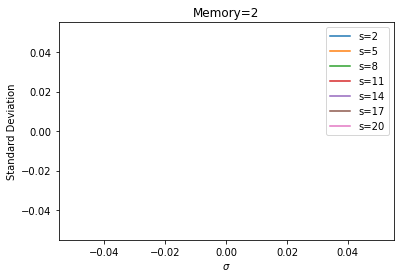

In [92]:
import numpy as np

def plot_vs_sigma(strategies, memory, cf, sigma_max=8):
    filtered = df[(df.strategies==strategies) & (df.memory==memory) & (df.cf==cf) & (df.sigma <= sigma_max)][["sigma", "std"]]

    vals = filtered.groupby("sigma").mean()
    errs = filtered.groupby("sigma").std()
    
    sigmas = vals.index
    # sigmas = vals.index + rng.normal(0,0.1, size=vals.index.shape)

    yerr = errs.values
    
    
    plt.plot(sigmas, vals.values)
    plt.fill_between(sigmas, np.ravel(vals.values - yerr), np.ravel(vals.values+yerr),alpha=0.3)
    
    
plot_vs_sigma(2,2,"choice")
plot_vs_sigma(5,2,"choice")
plot_vs_sigma(8,2,"choice")
plot_vs_sigma(11,2,"choice")
plot_vs_sigma(14,2,"choice")
plot_vs_sigma(17,2,"choice")
plot_vs_sigma(20,2,"choice")

plt.legend([
    "s=2",
    "s=5",
    "s=8",
    "s=11",
    "s=14",
    "s=17",
    "s=20"
])
plt.xlabel("$\sigma$")
plt.ylabel("Standard Deviation")
plt.title("Memory=2")
plt.savefig("images/mem2_choice.png")

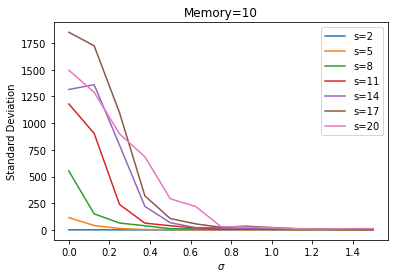

In [93]:
    
plot_vs_sigma(2,10,"mse",1.5)
plot_vs_sigma(10,10,"mse",1.5)
plot_vs_sigma(18,10,"mse",1.5)
plot_vs_sigma(26,10,"mse",1.5)
plot_vs_sigma(34,10,"mse",1.5)
plot_vs_sigma(42,10,"mse",1.5)
plot_vs_sigma(50,10,"mse",1.5)

plt.legend([
    "s=2",
    "s=5",
    "s=8",
    "s=11",
    "s=14",
    "s=17",
    "s=20"
])
plt.xlabel("$\sigma$")
plt.ylabel("Standard Deviation")
plt.title("Memory=10")
plt.savefig("images/mem10_mse.png")

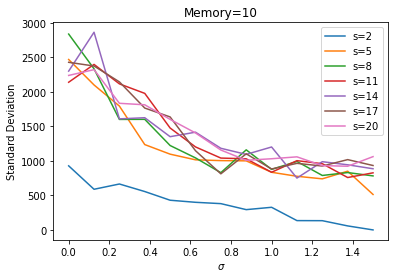

In [94]:
    
plot_vs_sigma(2,10,"choice",1.5)
plot_vs_sigma(10,10,"choice",1.5)
plot_vs_sigma(18,10,"choice",1.5)
plot_vs_sigma(26,10,"choice",1.5)
plot_vs_sigma(34,10,"choice",1.5)
plot_vs_sigma(42,10,"choice",1.5)
plot_vs_sigma(50,10,"choice",1.5)

plt.legend([
    "s=2",
    "s=5",
    "s=8",
    "s=11",
    "s=14",
    "s=17",
    "s=20"
])
plt.xlabel("$\sigma$")
plt.ylabel("Standard Deviation")
plt.title("Memory=10")
plt.savefig("images/mem10_choice.png")

There is something interesting going on here but I'm not sure how much to get into it... Looks like with the "choice" strategy function, standard deviation of atttendance initially decreases as sigma increases, but eventually itt starts to increase again.  Could this be because as strategies become more varied, new regions of strategy space open up that could be more optimal, leading to higher synchronization?

In [80]:
df[df.strategies==10].groupby(["strategies", "memory"]).count()

threshold  cf  sigma  std
strategies memory                           
10         2              64  64     64   64
           5              64  64     64   64
           8              64  64     64   64
           10              8   8      8    8
           11             64  64     64   64
           14             64  64     64   64
           17             64  64     64   64
           20             64  64     64   64

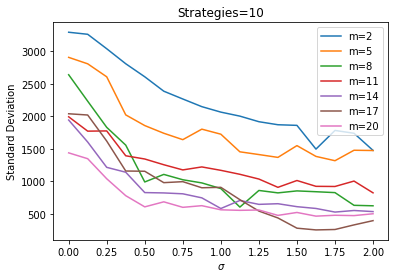

In [86]:
    
plot_vs_sigma(10,2,"choice",2)
plot_vs_sigma(10,5,"choice",2)
plot_vs_sigma(10,8,"choice",2)
plot_vs_sigma(10,11,"choice",2)
plot_vs_sigma(10,14,"choice",2)
plot_vs_sigma(10,17,"choice",2)
plot_vs_sigma(10,20,"choice",2)

plt.legend([
    "m=2",
    "m=5",
    "m=8",
    "m=11",
    "m=14",
    "m=17",
    "m=20"
])
plt.xlabel("$\sigma$")
plt.ylabel("Standard Deviation")
plt.title("Strategies=10")
plt.savefig("images/s10_choice.png")

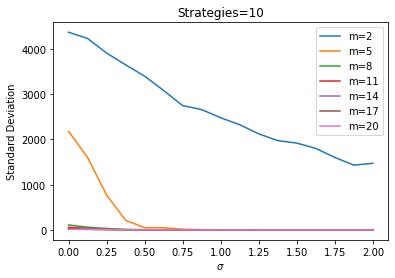

In [87]:
    
plot_vs_sigma(10,2,"mse",2)
plot_vs_sigma(10,5,"mse",2)
plot_vs_sigma(10,8,"mse",2)
plot_vs_sigma(10,11,"mse",2)
plot_vs_sigma(10,14,"mse",2)
plot_vs_sigma(10,17,"mse",2)
plot_vs_sigma(10,20,"mse",2)

plt.legend([
    "m=2",
    "m=5",
    "m=8",
    "m=11",
    "m=14",
    "m=17",
    "m=20"
])
plt.xlabel("$\sigma$")
plt.ylabel("Standard Deviation")
plt.title("Strategies=10")
plt.savefig("images/s10_mse.png")

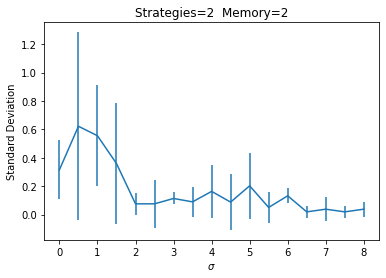

In [7]:

def plot_vs_sigma(strategies, memory):
    filtered = df[(df.strategies==strategies) & (df.memory==memory)][["sigma", "std"]]

    vals = filtered.groupby("sigma").mean()
    errs = filtered.groupby("sigma").std()

    yerr = np.ravel(errs.values)

    plt.errorbar(vals.index, vals.values, yerr=yerr)
    plt.xlabel("$\sigma$")
    plt.ylabel("Standard Deviation")
    plt.title(f"Strategies={strategies}  Memory={memory}")
    
plot_vs_sigma(2,2)

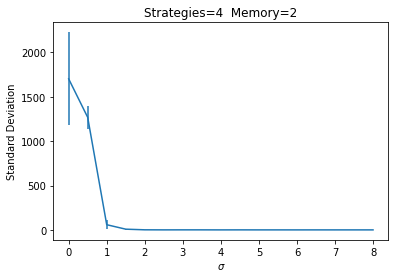

In [67]:
plot_vs_sigma(4,2)

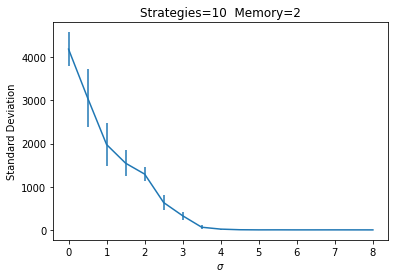

In [68]:
plot_vs_sigma(10,2)

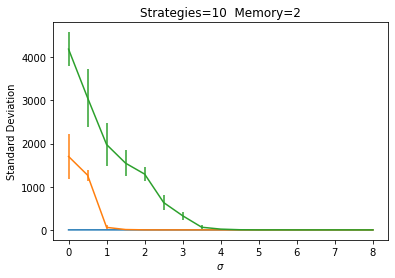

In [8]:
plot_vs_sigma(2,2)
plot_vs_sigma(4,2)
plot_vs_sigma(10,2)

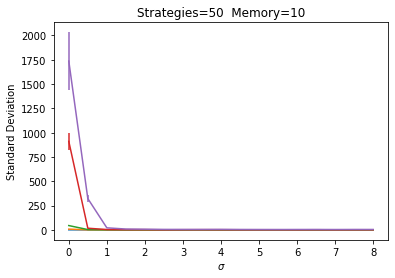

In [9]:
plot_vs_sigma(2,10)
plot_vs_sigma(5,10)
plot_vs_sigma(10,10)
plot_vs_sigma(20,10)
plot_vs_sigma(50,10)

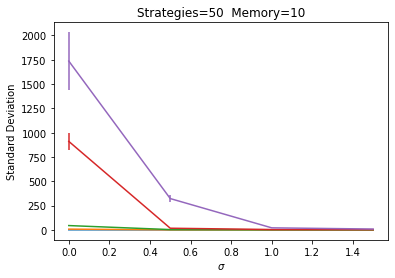

In [13]:
def plot_vs_sigma(strategies, memory, sigma_max=8):
    filtered = df[(df.strategies==strategies) & (df.memory==memory) & (df.sigma <= sigma_max)][["sigma", "std"]]

    vals = filtered.groupby("sigma").mean()
    errs = filtered.groupby("sigma").std()

    yerr = np.ravel(errs.values)

    plt.errorbar(vals.index, vals.values, yerr=yerr)
    plt.xlabel("$\sigma$")
    plt.ylabel("Standard Deviation")
    plt.title(f"Strategies={strategies}  Memory={memory}")
    
    
plot_vs_sigma(2,10, 1.5)
plot_vs_sigma(5,10, 1.5)
plot_vs_sigma(10,10, 1.5)
plot_vs_sigma(20,10, 1.5)
plot_vs_sigma(50,10, 1.5)

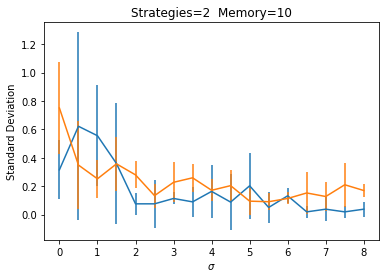

In [10]:
plot_vs_sigma(2,2)
plot_vs_sigma(2,10)

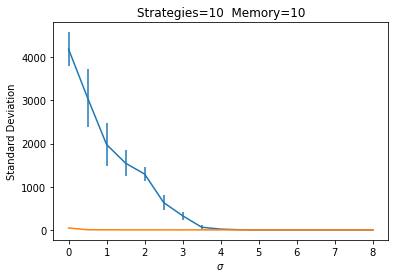

In [11]:
plot_vs_sigma(10,2)
plot_vs_sigma(10,10)

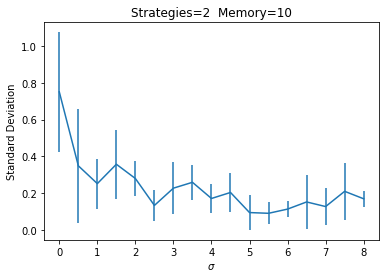

In [69]:
plot_vs_sigma(2,10)

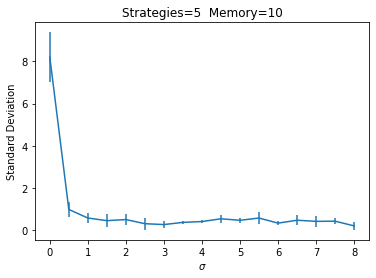

In [71]:
plot_vs_sigma(5, 10)

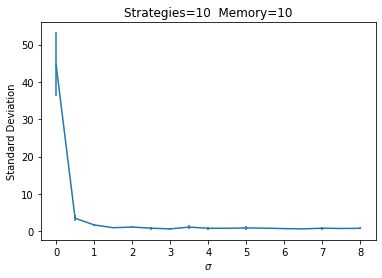

In [72]:
plot_vs_sigma(10, 10)

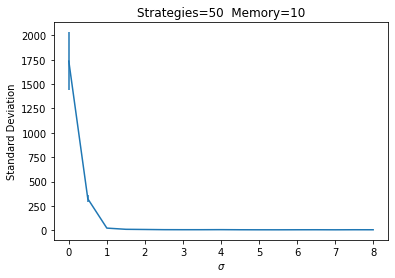

In [73]:
plot_vs_sigma(50, 10)

In [14]:
2/32

0.0625